In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split

In [31]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [32]:
!pip install openpyxl


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
df = pd.read_excel("Bank_Personal_Loan_Modelling.xlsx")
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


## ID : Identifiant
## Age : Âge
## Experience : Expérience (professionnelle)
## Income : Revenu
## ZIP Code : Code postal
## Family : Taille de la famille
## CCAvg : Moyenne des dépenses sur les cartes de crédit
## Education : Niveau d'éducation
## Mortgage : Montant de l'hypothèque
## Personal Loan : Prêt personnel (indique si la personne a un prêt personnel)
## Securities Account : Compte de titres (indique si la personne a un compte de titres)
## CD Account : Compte de dépôt à terme (indique si la personne a un compte de dépôt à terme)
## Online : Service bancaire en ligne (indique si la personne utilise les services bancaires en ligne)
## CreditCard : Carte de crédit (indique si la personne a une carte de crédit)

In [34]:
df.shape

(5000, 14)

In [35]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [38]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

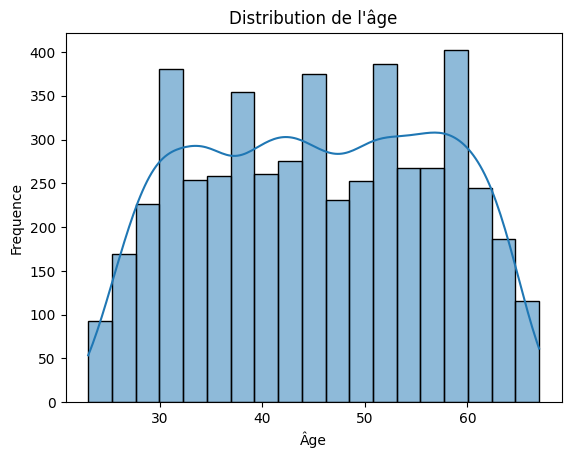

In [39]:
sns.histplot(df['Age'], kde=True)
plt.title('Distribution de l\'âge')
plt.xlabel('Âge')
plt.ylabel('Frequence')
plt.show()

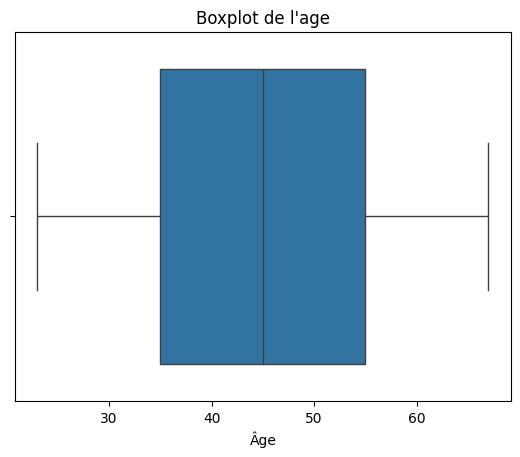

In [40]:
sns.boxplot(x=df['Age'])
plt.title('Boxplot de l\'age')
plt.xlabel('Âge')
plt.show()

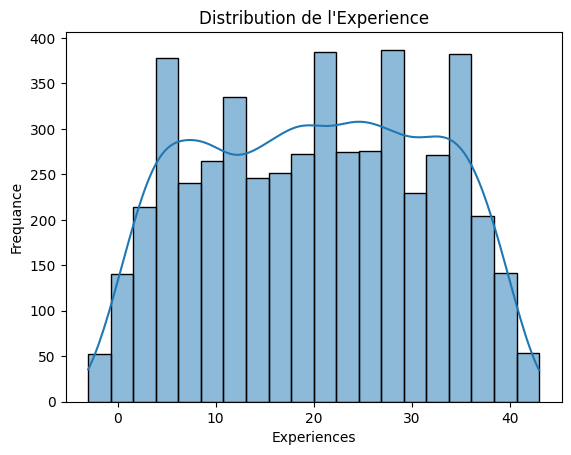

In [41]:
sns.histplot(df['Experience'], kde=True)
plt.title('Distribution de l\'Experience')
plt.xlabel('Experiences')
plt.ylabel('Frequance')
plt.show()

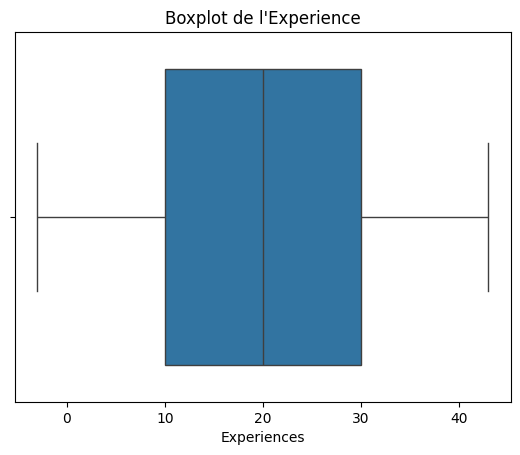

In [42]:
sns.boxplot(x=df['Experience'])
plt.title('Boxplot de l\'Experience')
plt.xlabel('Experiences')
plt.show()

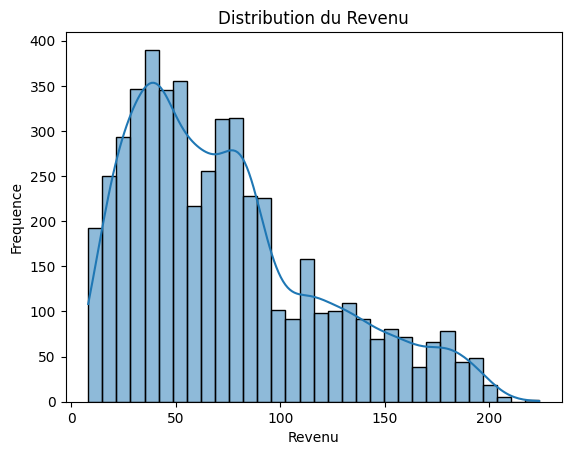

In [43]:
sns.histplot(df['Income'], kde=True)
plt.title('Distribution du Revenu')
plt.xlabel('Revenu')
plt.ylabel('Frequence')
plt.savefig('distribution_Revenus.png', dpi=300, bbox_inches='tight')
plt.show()

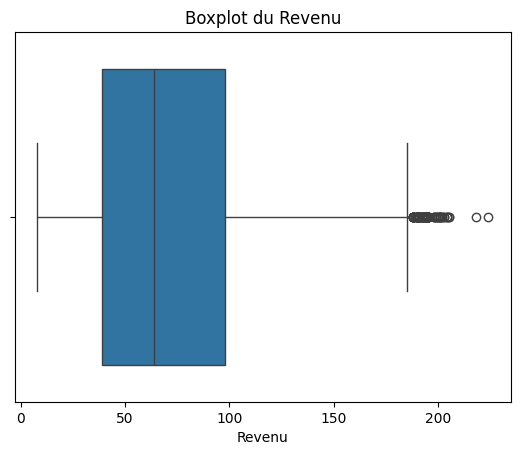

In [44]:
sns.boxplot(x=df['Income'])
plt.title('Boxplot du Revenu')
plt.xlabel('Revenu')
plt.show()

In [45]:
def calculer_pourcentage_valeurs_aberrantes(df, Income):
    """
    Calcule le pourcentage de valeurs aberrantes dans une colonne d'un DataFrame.

    Paramètres :
        df (pd.DataFrame) : Le DataFrame contenant les données.
        colonne (str) : Le nom de la colonne à analyser.

    Retourne :
        float : Le pourcentage de valeurs aberrantes.
    """

    Q1 = df['Income'].quantile(0.25)
    Q3 = df['Income'].quantile(0.75)
    IQR = Q3 - Q1

    borne_inferieure = Q1 - 1.5 * IQR
    borne_superieure = Q3 + 1.5 * IQR

    valeurs_aberrantes = df[(df['Income'] < borne_inferieure) | (df['Income'] > borne_superieure)]
    pourcentage_valeurs_aberrantes = (len(valeurs_aberrantes) / len(df)) * 100

    return pourcentage_valeurs_aberrantes

pourcentage_income_aberrantes = calculer_pourcentage_valeurs_aberrantes(df, 'Income')
print(f"Le pourcentage de valeurs aberrantes dans la colonne 'Income' est : {pourcentage_income_aberrantes:.2f}%")

Le pourcentage de valeurs aberrantes dans la colonne 'Income' est : 1.92%


In [46]:
df['Income'].unique()

array([ 49,  34,  11, 100,  45,  29,  72,  22,  81, 180, 105, 114,  40,
       112, 130, 193,  21,  25,  63,  62,  43, 152,  83, 158,  48, 119,
        35,  41,  18,  50, 121,  71, 141,  80,  84,  60, 132, 104,  52,
       194,   8, 131, 190,  44, 139,  93, 188,  39, 125,  32,  20, 115,
        69,  85, 135,  12, 133,  19,  82, 109,  42,  78,  51, 113, 118,
        64, 161,  94,  15,  74,  30,  38,   9,  92,  61,  73,  70, 149,
        98, 128,  31,  58,  54, 124, 163,  24,  79, 134,  23,  13, 138,
       171, 168,  65,  10, 148, 159, 169, 144, 165,  59,  68,  91, 172,
        55, 155,  53,  89,  28,  75, 170, 120,  99, 111,  33, 129, 122,
       150, 195, 110, 101, 191, 140, 153, 173, 174,  90, 179, 145, 200,
       183, 182,  88, 160, 205, 164,  14, 175, 103, 108, 185, 204, 154,
       102, 192, 202, 162, 142,  95, 184, 181, 143, 123, 178, 198, 201,
       203, 189, 151, 199, 224, 218])

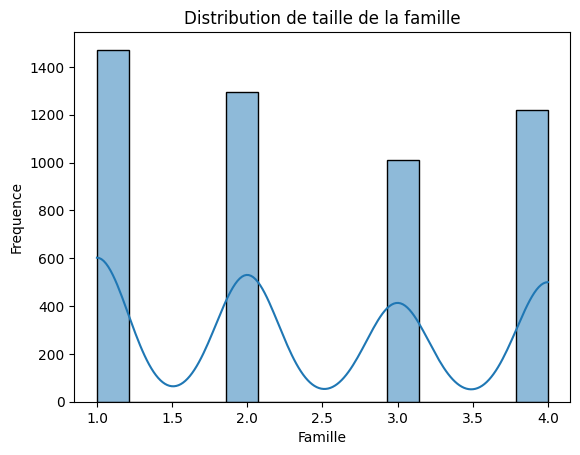

In [47]:
sns.histplot(df['Family'], kde=True)
plt.title('Distribution de taille de la famille')
plt.xlabel('Famille')
plt.ylabel('Frequence')
plt.savefig('Taille de famille.png', dpi=300, bbox_inches='tight')
plt.show()

In [48]:
df['Family'].value_counts()

Family
1    1472
2    1296
4    1222
3    1010
Name: count, dtype: int64

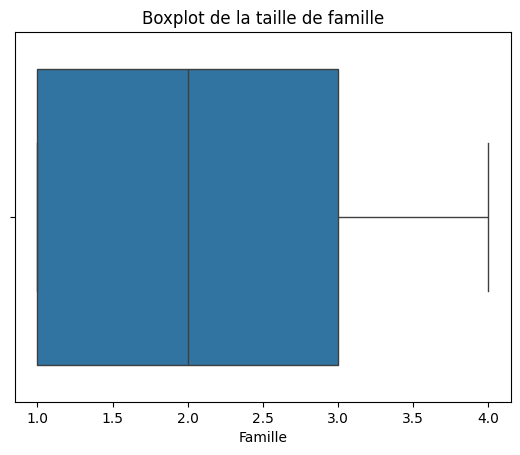

In [49]:
sns.boxplot(x=df['Family'])
plt.title('Boxplot de la taille de famille')
plt.xlabel('Famille')
plt.show()

In [50]:
df['CCAvg'].unique()

array([ 1.6       ,  1.5       ,  1.        ,  2.7       ,  0.4       ,
        0.3       ,  0.6       ,  8.9       ,  2.4       ,  0.1       ,
        3.8       ,  2.5       ,  2.        ,  4.7       ,  8.1       ,
        0.5       ,  0.9       ,  1.2       ,  0.7       ,  3.9       ,
        0.2       ,  2.2       ,  3.3       ,  1.8       ,  2.9       ,
        1.4       ,  5.        ,  2.3       ,  1.1       ,  5.7       ,
        4.5       ,  2.1       ,  8.        ,  1.7       ,  0.        ,
        2.8       ,  3.5       ,  4.        ,  2.6       ,  1.3       ,
        5.6       ,  5.2       ,  3.        ,  4.6       ,  3.6       ,
        7.2       ,  1.75      ,  7.4       ,  2.66666667,  7.5       ,
        6.5       ,  7.8       ,  7.9       ,  4.1       ,  1.9       ,
        4.3       ,  6.8       ,  5.1       ,  3.1       ,  0.8       ,
        3.7       ,  6.2       ,  0.75      ,  2.33333333,  4.9       ,
        0.66666667,  3.2       ,  5.5       ,  6.9       ,  4.33

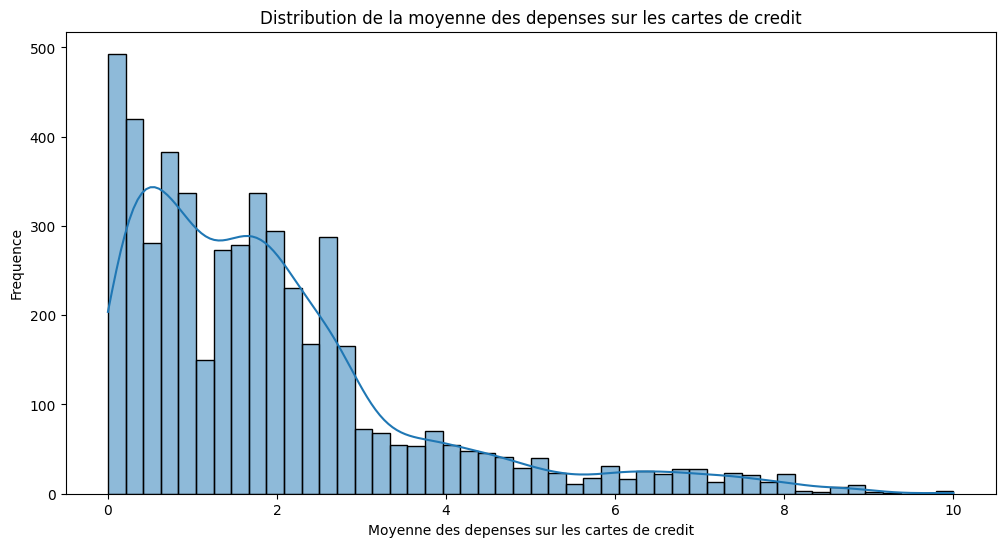

In [51]:
plt.figure(figsize=(12, 6))
#plt.xticks(range(0, int(df['CCAvg'].max()) + 1, 1))  # Ticks entiers espacés de 1
sns.histplot(df['CCAvg'], kde=True)
plt.title('Distribution de la moyenne des depenses sur les cartes de credit')
plt.xlabel('Moyenne des depenses sur les cartes de credit')
plt.ylabel('Frequence')
plt.show()

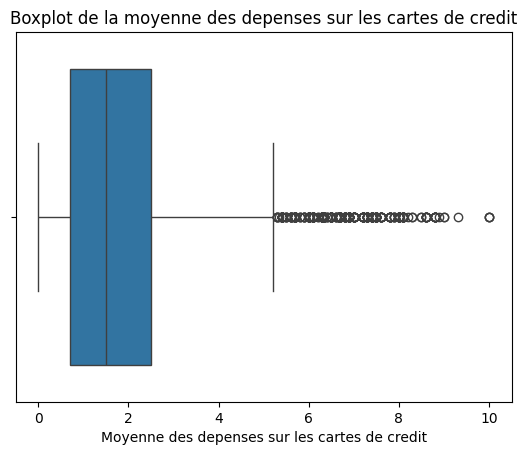

In [52]:
sns.boxplot(x=df['CCAvg'])
plt.title('Boxplot de la moyenne des depenses sur les cartes de credit')
plt.xlabel('Moyenne des depenses sur les cartes de credit')
plt.show()

In [53]:
def calculer_pourcentage_valeurs_aberrantes(df, CCAvg):
    """
    Calcule le pourcentage de valeurs aberrantes dans une colonne d'un DataFrame.

    Paramètres :
        df (pd.DataFrame) : Le DataFrame contenant les données.
        colonne (str) : Le nom de la colonne à analyser.

    Retourne :
        float : Le pourcentage de valeurs aberrantes.
    """

    Q1 = df['CCAvg'].quantile(0.25)
    Q3 = df['CCAvg'].quantile(0.75)
    IQR = Q3 - Q1

    borne_inferieure = Q1 - 1.5 * IQR
    borne_superieure = Q3 + 1.5 * IQR

    valeurs_aberrantes = df[(df['CCAvg'] < borne_inferieure) | (df['CCAvg'] > borne_superieure)]
    pourcentage_valeurs_aberrantes = (len(valeurs_aberrantes) / len(df)) * 100

    return pourcentage_valeurs_aberrantes

pourcentage_income_aberrantes = calculer_pourcentage_valeurs_aberrantes(df, 'CCAvg')
print(f"Le pourcentage de valeurs aberrantes dans la colonne 'Income' est : {pourcentage_income_aberrantes:.2f}%")

Le pourcentage de valeurs aberrantes dans la colonne 'Income' est : 6.48%


###gestion des valeurs aberrantes

In [54]:
import pandas as pd

def remplacer_aberrantes_par_mediane(df, CCAvg):
    """
    Remplace les valeurs aberrantes d'une colonne par la médiane.

    Paramètres :
        df (pd.DataFrame) : Le DataFrame contenant les données.
        colonne (str) : Le nom de la colonne à traiter.

    Retourne :
        pd.DataFrame : Le DataFrame avec les valeurs aberrantes remplacées.
    """

    # Calcul des quartiles et de l'IQR
    Q1 = df['CCAvg'].quantile(0.25)
    Q3 = df['CCAvg'].quantile(0.75)
    IQR = Q3 - Q1

    # Calcul des bornes pour identifier les valeurs aberrantes
    borne_inferieure = Q1 - 1.5 * IQR
    borne_superieure = Q3 + 1.5 * IQR

    # Calcul de la médiane
    mediane = df['CCAvg'].median()

    # Remplacement des valeurs aberrantes par la médiane
    df['CCAvg'] = df['CCAvg'].apply(lambda x: mediane if x < borne_inferieure or x > borne_superieure else x)

    return df

# Supposons que votre dataframe s'appelle 'df'
# Si votre dataframe a un nom différent, remplacez 'df' par le nom approprié.

# Remplacement des valeurs aberrantes dans la colonne 'CCAvg'
df = remplacer_aberrantes_par_mediane(df, 'CCAvg')

# Affichage du DataFrame modifié
print(df['CCAvg'])

0       1.6
1       1.5
2       1.0
3       2.7
4       1.0
       ... 
4995    1.9
4996    0.4
4997    0.3
4998    0.5
4999    0.8
Name: CCAvg, Length: 5000, dtype: float64


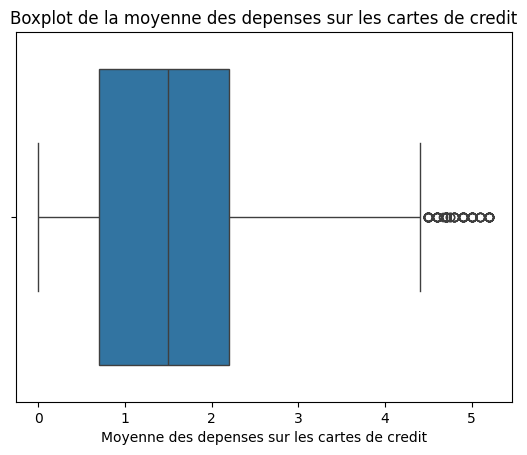

In [55]:
sns.boxplot(x=df['CCAvg'])
plt.title('Boxplot de la moyenne des depenses sur les cartes de credit')
plt.xlabel('Moyenne des depenses sur les cartes de credit')
plt.show()

In [56]:
def calculer_pourcentage_valeurs_aberrantes(df, CCAvg):
    """
    Calcule le pourcentage de valeurs aberrantes dans une colonne d'un DataFrame.

    Paramètres :
        df (pd.DataFrame) : Le DataFrame contenant les données.
        colonne (str) : Le nom de la colonne à analyser.

    Retourne :
        float : Le pourcentage de valeurs aberrantes.
    """

    Q1 = df['CCAvg'].quantile(0.25)
    Q3 = df['CCAvg'].quantile(0.75)
    IQR = Q3 - Q1

    borne_inferieure = Q1 - 1.5 * IQR
    borne_superieure = Q3 + 1.5 * IQR

    valeurs_aberrantes = df[(df['CCAvg'] < borne_inferieure) | (df['CCAvg'] > borne_superieure)]
    pourcentage_valeurs_aberrantes = (len(valeurs_aberrantes) / len(df)) * 100

    return pourcentage_valeurs_aberrantes

pourcentage_income_aberrantes = calculer_pourcentage_valeurs_aberrantes(df, 'CCAvg')
print(f"Le pourcentage de valeurs aberrantes dans la colonne 'CCAvg' est : {pourcentage_income_aberrantes:.2f}%")

Le pourcentage de valeurs aberrantes dans la colonne 'CCAvg' est : 2.78%


In [57]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

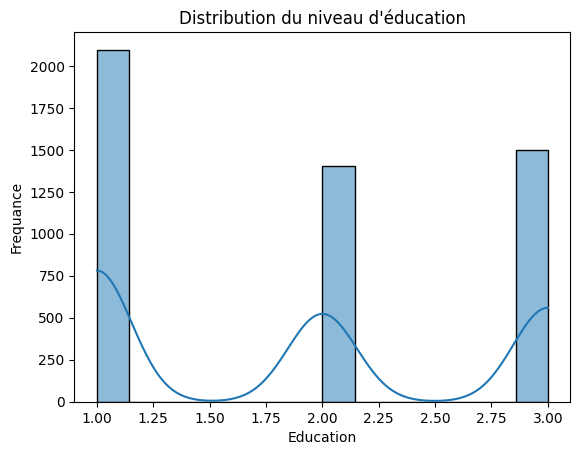

In [58]:
sns.histplot(df['Education'], kde=True)
plt.title('Distribution du niveau d\'éducation')
plt.xlabel('Education')
plt.ylabel('Frequance')
plt.show()

In [59]:
df['Education'].value_counts()

Education
1    2096
3    1501
2    1403
Name: count, dtype: int64

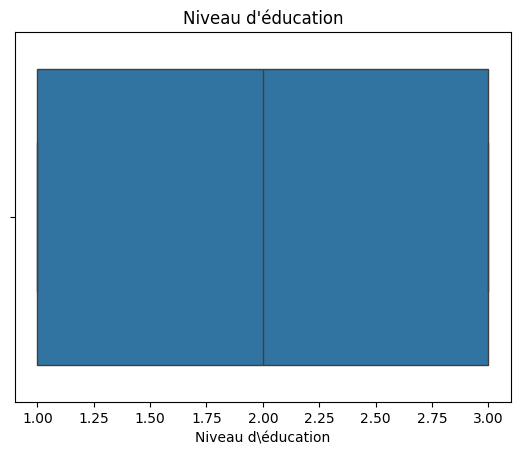

In [60]:
sns.boxplot(x=df['Education'])
plt.title('Niveau d\'éducation')
plt.xlabel('Niveau d\éducation')
plt.show()

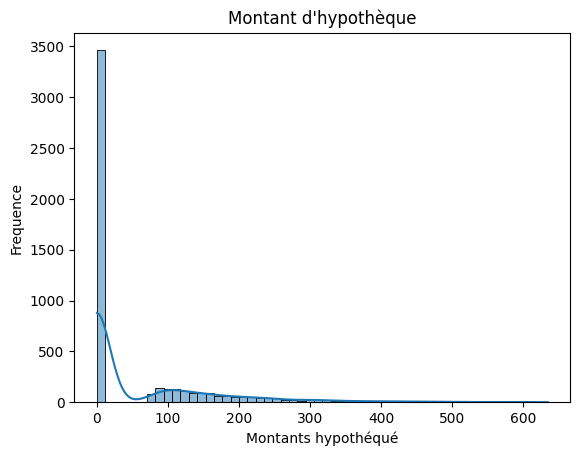

In [61]:
sns.histplot(df['Mortgage'], kde=True)
plt.title('Montant d\'hypothèque')
plt.xlabel('Montants hypothéqué')
plt.ylabel('Frequence')
plt.show()

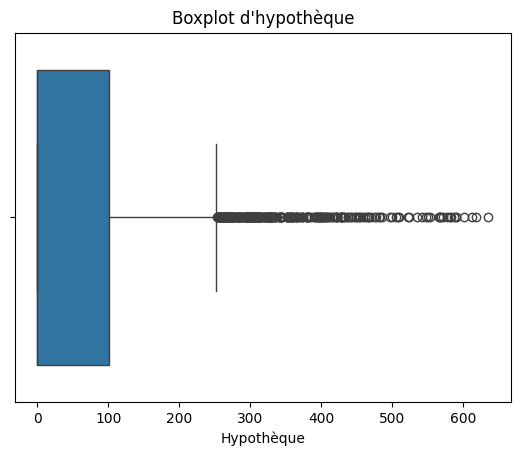

In [62]:
sns.boxplot(x=df['Mortgage'])
plt.title('Boxplot d\'hypothèque')
plt.xlabel('Hypothèque')
plt.show()

In [63]:
def calculer_pourcentage_valeurs_aberrantes(df, Mortgage):
    """
    Calcule le pourcentage de valeurs aberrantes dans une colonne d'un DataFrame.

    Paramètres :
        df (pd.DataFrame) : Le DataFrame contenant les données.
        colonne (str) : Le nom de la colonne à analyser.

    Retourne :
        float : Le pourcentage de valeurs aberrantes.
    """

    Q1 = df['Mortgage'].quantile(0.25)
    Q3 = df['Mortgage'].quantile(0.75)
    IQR = Q3 - Q1

    borne_inferieure = Q1 - 1.5 * IQR
    borne_superieure = Q3 + 1.5 * IQR

    valeurs_aberrantes = df[(df['Mortgage'] < borne_inferieure) | (df['Mortgage'] > borne_superieure)]
    pourcentage_valeurs_aberrantes = (len(valeurs_aberrantes) / len(df)) * 100

    return pourcentage_valeurs_aberrantes

pourcentage_income_aberrantes = calculer_pourcentage_valeurs_aberrantes(df, 'Mortgage')
print(f"Le pourcentage de valeurs aberrantes dans la colonne 'Mortgage' est : {pourcentage_income_aberrantes:.2f}%")

Le pourcentage de valeurs aberrantes dans la colonne 'Mortgage' est : 5.82%


In [64]:
df['Mortgage'].value_counts()

Mortgage
0      3462
98       17
103      16
89       16
91       16
       ... 
550       1
283       1
612       1
590       1
541       1
Name: count, Length: 347, dtype: int64

In [65]:
import pandas as pd

def remplacer_aberrantes_par_bornes_iqr(df, Mortgage):
    """
    Remplace les valeurs aberrantes d'une colonne par les bornes de l'IQR.

    Paramètres :
        df (pd.DataFrame) : Le DataFrame contenant les données.
        colonne (str) : Le nom de la colonne à traiter.

    Retourne :
        pd.DataFrame : Le DataFrame avec les valeurs aberrantes remplacées.
    """

    # Calcul des quartiles et de l'IQR
    Q1 = df['Mortgage'].quantile(0.25)
    Q3 = df['Mortgage'].quantile(0.75)
    IQR = Q3 - Q1

    # Calcul des bornes pour identifier les valeurs aberrantes
    borne_inferieure = Q1 - 1.5 * IQR
    borne_superieure = Q3 + 1.5 * IQR

    # Remplacement des valeurs aberrantes par les bornes
    df['Mortgage'] = df['Mortgage'].apply(lambda x: borne_inferieure if x < borne_inferieure else (borne_superieure if x > borne_superieure else x))

    return df

# Supposons que votre dataframe s'appelle 'df'
# Si votre dataframe a un nom différent, remplacez 'df' par le nom approprié.

# Remplacement des valeurs aberrantes dans la colonne 'Mortgage'
df = remplacer_aberrantes_par_bornes_iqr(df.copy(), 'Mortgage') #Utiliser copy() pour éviter de modifier le dataframe original.

# Affichage du DataFrame modifié
print(df['Mortgage'])

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
4995     0.0
4996    85.0
4997     0.0
4998     0.0
4999     0.0
Name: Mortgage, Length: 5000, dtype: float64


In [66]:
def calculer_pourcentage_valeurs_aberrantes(df, Mortgage):
    """
    Calcule le pourcentage de valeurs aberrantes dans une colonne d'un DataFrame.

    Paramètres :
        df (pd.DataFrame) : Le DataFrame contenant les données.
        colonne (str) : Le nom de la colonne à analyser.

    Retourne :
        float : Le pourcentage de valeurs aberrantes.
    """

    Q1 = df['Mortgage'].quantile(0.25)
    Q3 = df['Mortgage'].quantile(0.75)
    IQR = Q3 - Q1

    borne_inferieure = Q1 - 1.5 * IQR
    borne_superieure = Q3 + 1.5 * IQR

    valeurs_aberrantes = df[(df['Mortgage'] < borne_inferieure) | (df['Mortgage'] > borne_superieure)]
    pourcentage_valeurs_aberrantes = (len(valeurs_aberrantes) / len(df)) * 100

    return pourcentage_valeurs_aberrantes

pourcentage_income_aberrantes = calculer_pourcentage_valeurs_aberrantes(df, 'Mortgage')
print(f"Le pourcentage de valeurs aberrantes dans la colonne 'Mortgage' est : {pourcentage_income_aberrantes:.2f}%")

Le pourcentage de valeurs aberrantes dans la colonne 'Mortgage' est : 0.00%


In [67]:
df['Mortgage'].value_counts()

Mortgage
0.0      3462
252.5     291
98.0       17
103.0      16
91.0       16
         ... 
191.0       1
235.0       1
206.0       1
210.0       1
173.0       1
Name: count, Length: 180, dtype: int64

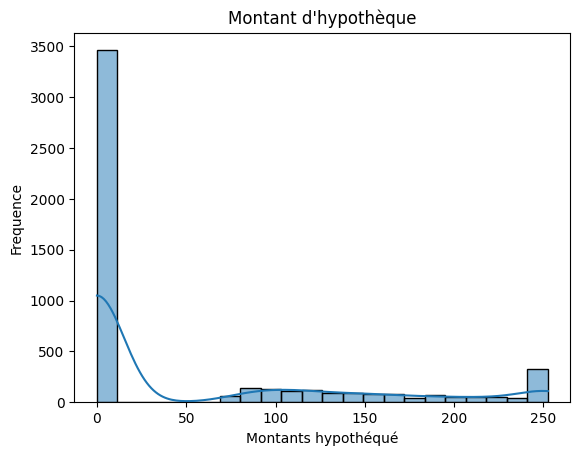

In [68]:
sns.histplot(df['Mortgage'], kde=True)
plt.title('Montant d\'hypothèque')
plt.xlabel('Montants hypothéqué')
plt.ylabel('Frequence')
plt.show()

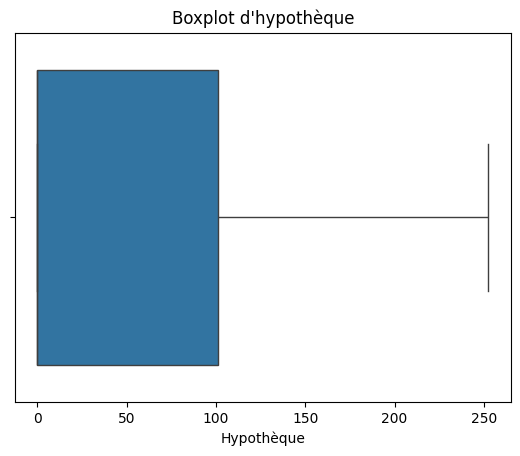

In [69]:
sns.boxplot(x=df['Mortgage'])
plt.title('Boxplot d\'hypothèque')
plt.xlabel('Hypothèque')
plt.show()

In [70]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   float64
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 547.0 KB


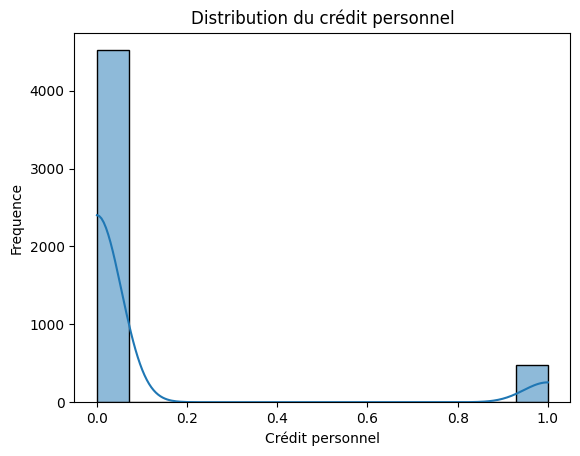

In [72]:
sns.histplot(df['Personal Loan'], kde=True)
plt.title('Distribution du crédit personnel')
plt.xlabel('Crédit personnel')
plt.ylabel('Frequence')
plt.show()

In [73]:
df['Personal Loan'].value_counts()

Personal Loan
0    4520
1     480
Name: count, dtype: int64

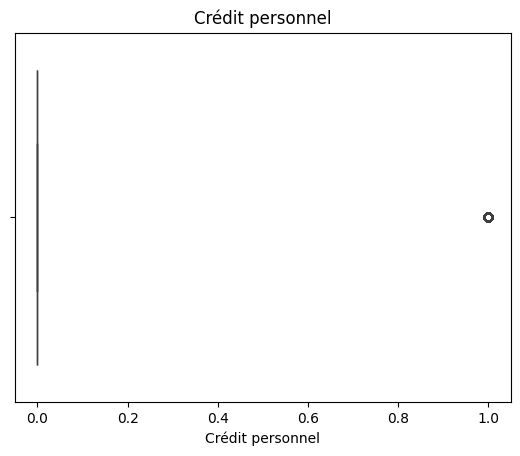

In [74]:
sns.boxplot(x=df['Personal Loan'])
plt.title('Crédit personnel')
plt.xlabel('Crédit personnel')
plt.show()

In [75]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

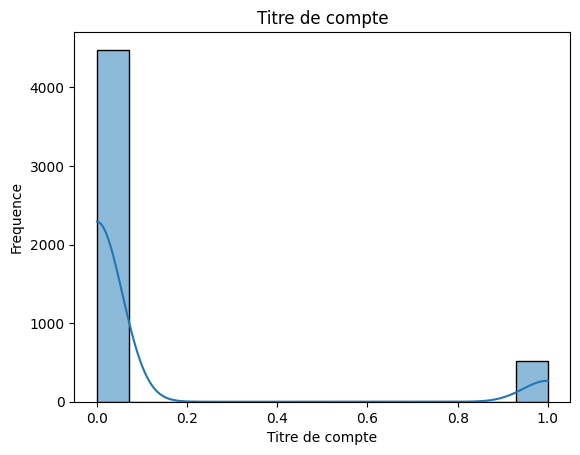

In [76]:
sns.histplot(df['Securities Account'], kde=True)
plt.title('Titre de compte')
plt.xlabel('Titre de compte')
plt.ylabel('Frequence')
plt.show()

In [77]:
df['Securities Account'].value_counts()

Securities Account
0    4478
1     522
Name: count, dtype: int64

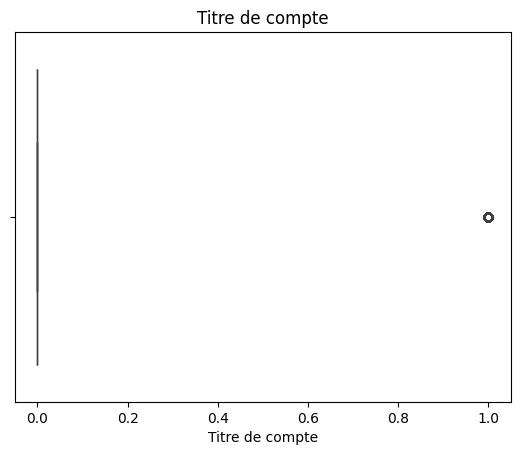

In [78]:
sns.boxplot(x=df['Securities Account'])
plt.title('Titre de compte')
plt.xlabel('Titre de compte')
plt.show()

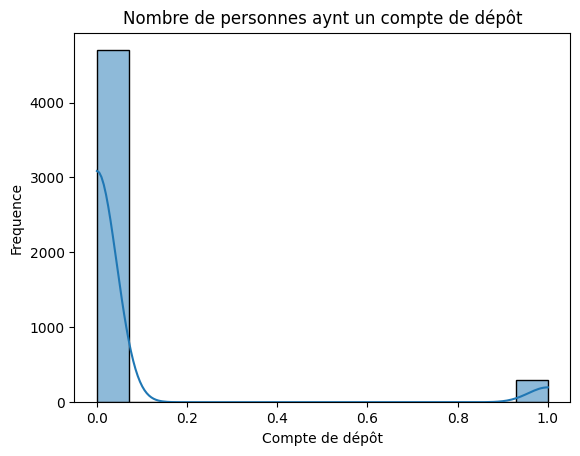

In [79]:
sns.histplot(df['CD Account'], kde=True)
plt.title('Nombre de personnes aynt un compte de dépôt')
plt.xlabel('Compte de dépôt')
plt.ylabel('Frequence')
plt.show()

In [80]:
df['CD Account'].value_counts()

CD Account
0    4698
1     302
Name: count, dtype: int64

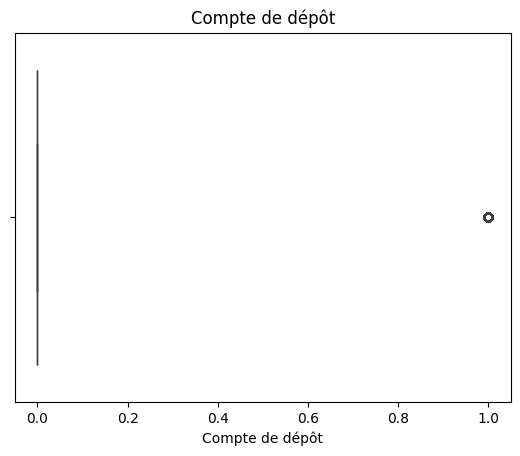

In [81]:
sns.boxplot(x=df['CD Account'])
plt.title('Compte de dépôt')
plt.xlabel('Compte de dépôt')
plt.show()

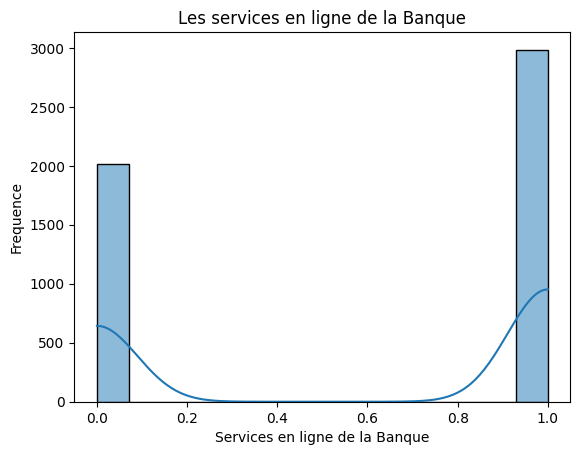

In [82]:
sns.histplot(df['Online'], kde=True)
plt.title('Les services en ligne de la Banque')
plt.xlabel('Services en ligne de la Banque')
plt.ylabel('Frequence')
plt.show()

In [83]:
df['Online'].value_counts()

Online
1    2984
0    2016
Name: count, dtype: int64

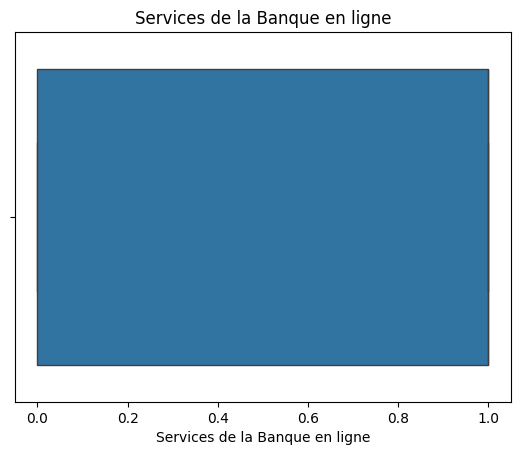

In [84]:
sns.boxplot(x=df['Online'])
plt.title('Services de la Banque en ligne')
plt.xlabel('Services de la Banque en ligne')
plt.show()

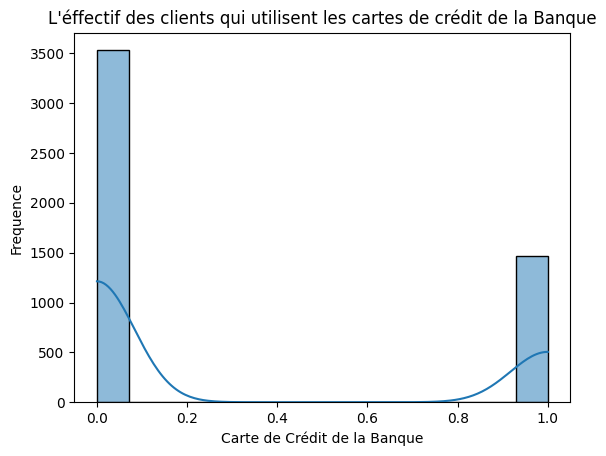

In [85]:
sns.histplot(df['CreditCard'], kde=True)
plt.title('L\'éffectif des clients qui utilisent les cartes de crédit de la Banque')
plt.xlabel('Carte de Crédit de la Banque')
plt.ylabel('Frequence')
plt.show()

In [86]:
df['CreditCard'].value_counts()

CreditCard
0    3530
1    1470
Name: count, dtype: int64

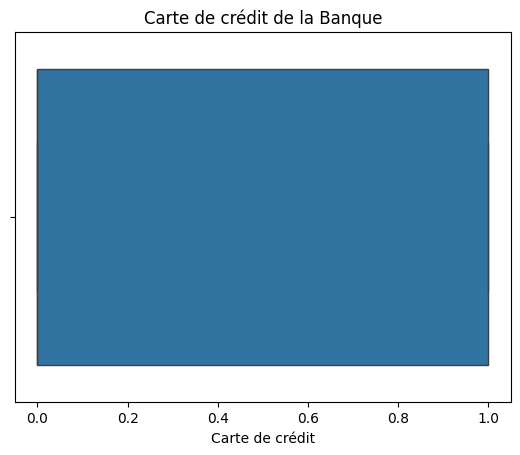

In [87]:
sns.boxplot(x=df['CreditCard'])
plt.title('Carte de crédit de la Banque')
plt.xlabel('Carte de crédit')
plt.show()

## Analyse Bivariée

In [88]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

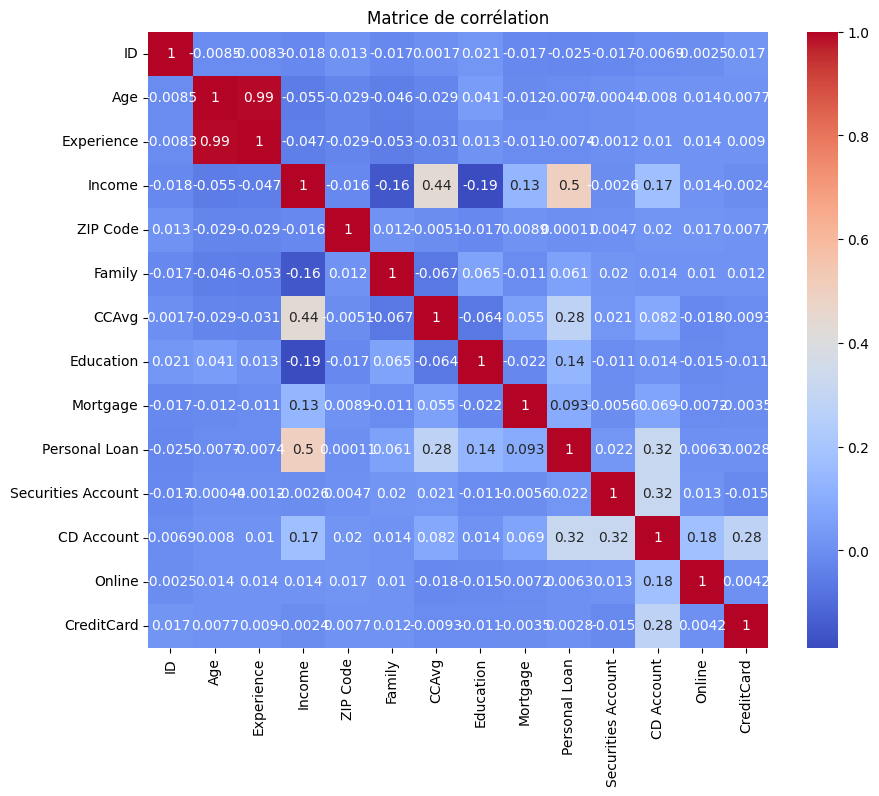

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def matrice_correlation(df):
    """
    Crée une matrice de corrélation pour visualiser la corrélation entre les variables numériques.

    Paramètres :
        df (pd.DataFrame) : Le DataFrame contenant les données.
    """

    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Matrice de corrélation')
    plt.savefig('Matrice de correlation.png', dpi=300, bbox_inches='tight')
    plt.show()

# Exemple d'utilisation (remplacez 'df' par votre DataFrame)
matrice_correlation(df)

## Machine Learning

Meilleurs hyperparamètres: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.988
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       895
           1       0.98      0.90      0.94       105

    accuracy                           0.99      1000
   macro avg       0.98      0.95      0.97      1000
weighted avg       0.99      0.99      0.99      1000

Modèle sauvegardé sous le nom 'modele_random_forest.pkl'


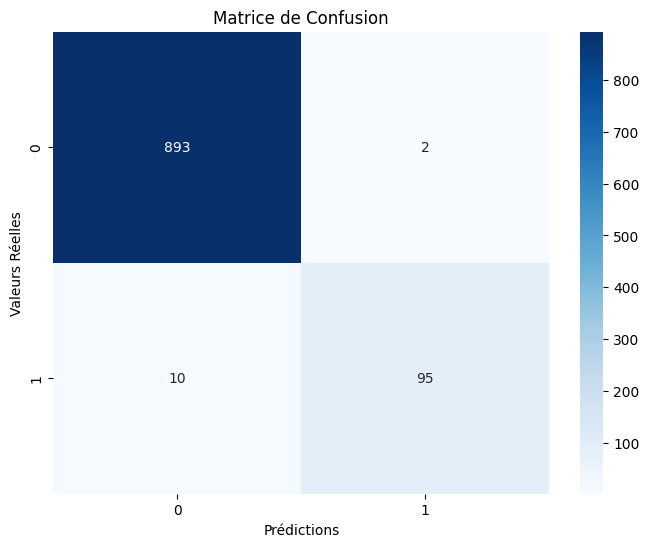

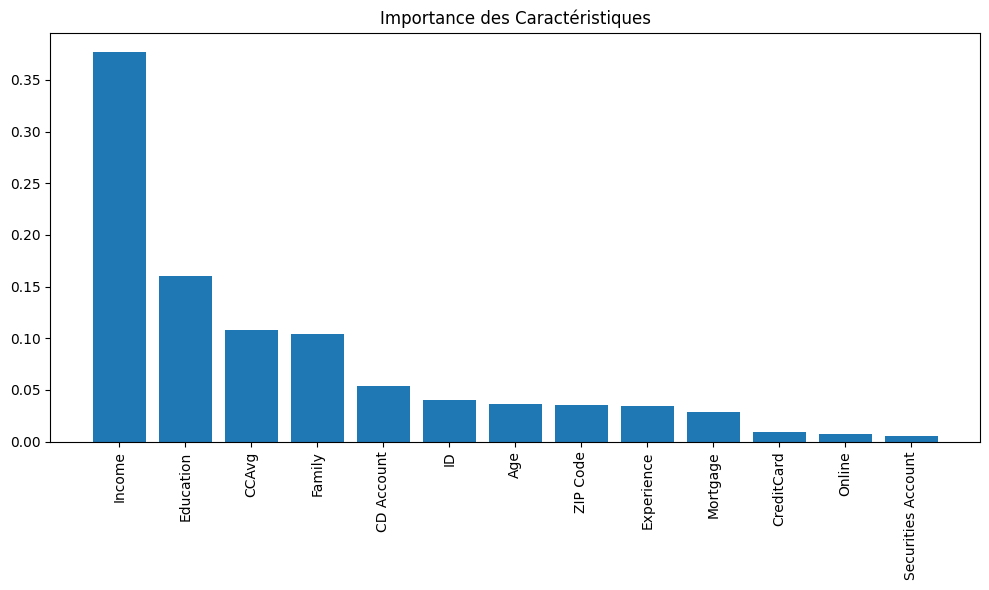

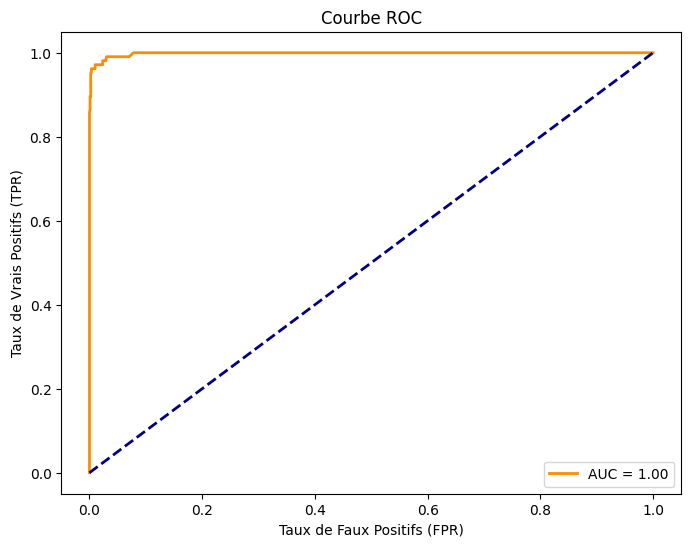

In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import pickle

# Supposons que votre dataframe s'appelle 'df'
# et que la colonne 'Personal Loan' est votre variable cible.

# Séparation des caractéristiques et de la cible
X = df.drop('Personal Loan', axis=1)
y = df['Personal Loan']

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Définition des hyperparamètres à régler
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Création du modèle de forêt aléatoire
rf = RandomForestClassifier(random_state=42)

# Recherche des meilleurs hyperparamètres avec validation croisée
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Meilleurs hyperparamètres
best_params = grid_search.best_params_
print(f'Meilleurs hyperparamètres: {best_params}')

# Entraînement du modèle avec les meilleurs hyperparamètres
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Prédictions sur les données de test
y_pred = best_rf.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

# Sauvegarde du modèle entraîné
with open('modele_random_forest.pkl', 'wb') as file:
    pickle.dump(best_rf, file)

print("Modèle sauvegardé sous le nom 'modele_random_forest.pkl'")


# 1. Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Valeurs Réelles')
plt.show()

# 2. Rapport de classification (visualisation textuelle déjà affichée)
# Vous pouvez l'afficher dans une interface utilisateur si nécessaire.

# 3. Importance des caractéristiques (Feature Importance)
feature_importances = best_rf.feature_importances_
feature_names = X.columns
sorted_indices = feature_importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.title("Importance des Caractéristiques")
plt.bar(range(X.shape[1]), feature_importances[sorted_indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

# 4. Courbe ROC (Receiver Operating Characteristic) et AUC (Area Under the Curve)
from sklearn.metrics import roc_curve, roc_auc_score

# Probabilités de la classe positive
y_prob = best_rf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

## Code Streamlit

In [ ]:
df.columns

In [ ]:
import streamlit as st
import pandas as pd
import pickle

# Chargement du modèle entraîné
with open('modele_random_forest.pkl', 'rb') as file:
    model = pickle.load(file)

def predict_personal_loan(input_data):
    """Effectue une prédiction avec le modèle."""
    prediction = model.predict(input_data)
    return prediction[0]

def main():
    st.title("Prédiction de prêt personnel")
    st.write("Veuillez entrer les informations du client.")

    # Champs de saisie pour les caractéristiques du client
    id_client = st.number_input("ID", min_value=0, value=1)
    age = st.number_input("Âge", min_value=18, max_value=100, value=30)
    experience = st.number_input("Expérience", min_value=0, value=5)
    income = st.number_input("Revenu annuel", min_value=0, value=50000)
    zip_code = st.number_input("Code Postal", min_value=0, value=10000)
    family = st.number_input("Taille de la famille", min_value=1, max_value=4, value=2)
    ccavg = st.number_input("Moyenne des dépenses sur les cartes de crédit", min_value=0.0, value=1000.0)
    education = st.selectbox("Niveau d'éducation", [1, 2, 3])
    mortgage = st.number_input("Montant de l'hypothèque", min_value=0, value=0)
    securities_account = st.selectbox("Compte de titres", [0, 1])
    cd_account = st.selectbox("Compte de dépôt à terme", [0, 1])
    online = st.selectbox("Services bancaires en ligne", [0, 1])
    creditcard = st.selectbox("Carte de crédit", [0, 1])

    # Création du DataFrame avec les données saisies
    input_data = pd.DataFrame({
        'ID': [id_client],
        'Age': [age],
        'Experience': [experience],
        'Income': [income],
        'ZIP Code': [zip_code],
        'Family': [family],
        'CCAvg': [ccavg],
        'Education': [education],
        'Mortgage': [mortgage],
        'Securities Account': [securities_account],
        'CD Account': [cd_account],
        'Online': [online],
        'CreditCard': [creditcard]
    })

    if st.button("Prédire"):
        prediction = predict_personal_loan(input_data)
        if prediction == 1:
            st.success("Le client est susceptible de souscrire un prêt personnel.")
        else:
            st.error("Le client n'est pas susceptible de souscrire un prêt personnel.")

if __name__ == '__main__':
    main()